# LLamaIndex- Quickstart Guide

## Installation

In [11]:
!pip3 install llama-index sentence-transformers openai
!pip3 install llama-cpp-python

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 3.6 MB 1.5 MB/s eta 0:00:01
  distutils: /private/var/folders/sm/n2hk31c12wv5pm94flx90n4m0000gn/T/pip-build-env-_agt4cgo/normal/lib/python3.9/site-packages
  sysconfig: /Library/Python/3.9/site-packages
  distutils: /private/var/folders/sm/n2hk31c12wv5pm94flx90n4m0000gn/T/pip-build-env-_agt4cgo/normal/lib/python3.9/site-packages
  sysconfig: /Library/Python/3.9/site-packages
  user = False
  home = None
  root = None
  prefix = '/private/var/folders/sm/n2hk31c12wv5pm94flx90n4m0000gn/T/pip-build-env-_agt4cgo/normal'
  distutils: /private/var/folders/sm/n2hk31c12wv5pm94flx90n4m0000gn/T/pip-build-env-_agt4cgo/overlay/lib/python3.9/site-packages
  sysconfig: /Library/Py

## Workflow for LLamaIndex

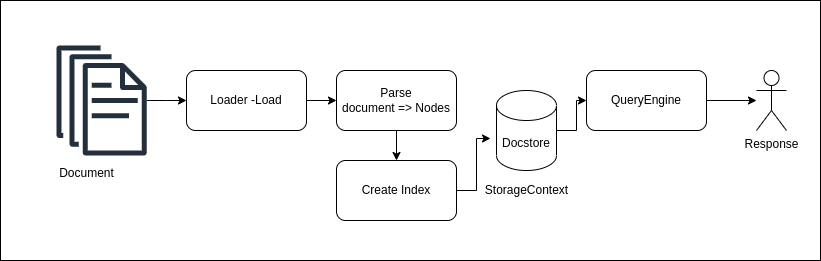

### Workflow Image Credits: [AI Planet](https://aiplanet.com)

## Load the data

In [12]:
from llama_index import VectorStoreIndex, SimpleDirectoryReader
from llama_index.llms import LlamaCPP

Create a new folder with `data` or any name. Once you create a new data folder, insde that add your .txt data. You can also add different dataloaders. Refer: [Connector](https://gpt-index.readthedocs.io/en/latest/core_modules/data_modules/connector/root.html)

This will load in documents through load_data function.

The folder should look like:

* data
    * my_data.txt

Note:
- There are two approaches here to proceed:
  - 1) OpenAI - using OpenAI API Key
  - 2) LLamaCPP - using llama2-13-chat model

If you declare OpenAI key, then it will use the GPT model, if not specified by default it will use llama2-13-chat

In [13]:
import os
from getpass import getpass

# os.environ['OPENAI_API_KEY'] = getpass()

llm = LlamaCPP(
    # You can pass in the URL to a GGML model to download it automatically
    model_url="https://huggingface.co/TheBloke/Llama-2-13B-chat-GGUF/resolve/main/llama-2-13b-chat.Q4_0.gguf" )

total size (MB): 7365.83


7025it [06:55, 16.92it/s]                          
llama_model_loader: loaded meta data with 19 key-value pairs and 363 tensors from /Users/neetigoenka/Library/Caches/llama_index/models/llama-2-13b-chat.Q4_0.gguf (version GGUF V2 (latest))
llama_model_loader: - tensor    0:                token_embd.weight q4_0     [  5120, 32000,     1,     1 ]
llama_model_loader: - tensor    1:           blk.0.attn_norm.weight f32      [  5120,     1,     1,     1 ]
llama_model_loader: - tensor    2:            blk.0.ffn_down.weight q4_0     [ 13824,  5120,     1,     1 ]
llama_model_loader: - tensor    3:            blk.0.ffn_gate.weight q4_0     [  5120, 13824,     1,     1 ]
llama_model_loader: - tensor    4:              blk.0.ffn_up.weight q4_0     [  5120, 13824,     1,     1 ]
llama_model_loader: - tensor    5:            blk.0.ffn_norm.weight f32      [  5120,     1,     1,     1 ]
llama_model_loader: - tensor    6:              blk.0.attn_k.weight q4_0     [  5120,  5120,     1,     1 ]
lla

We are using OPENAPI_API since it is fast. In absence of API_KEY use the default llama2 model. If you are running Llama model, do change the runtime to GPU

In [3]:
documents = SimpleDirectoryReader('data').load_data()
index = VectorStoreIndex.from_documents(documents)

ValueError: Directory data does not exist.

### This is what our data looks like:

In [9]:
print(documents[0].text)

The history of Artificial Intelligence (AI) is a fascinating journey that spans several decades and is marked by significant milestones, breakthroughs, and shifts in paradigms. This history can be divided into several key phases:

1. **Early Roots (Antiquity to 1940s)**:
   - The concept of creating artificial beings with human-like intelligence dates back to ancient myths and legends, such as the story of Pygmalion and Galatea in Greek mythology.
   - Mathematician and logician George Boole's work on symbolic logic in the mid-19th century laid the groundwork for AI's logical foundations.
   - Alan Turing's 1936 paper, "On Computable Numbers," introduced the idea of a theoretical machine that could simulate any human's thought processes, known as the Turing Machine. This paper is considered a pivotal moment in AI's intellectual history.

2. **Early Computers and the Dartmouth Workshop (1940s-1950s)**:
   - The development of digital computers during World War II and the post-war years 

A Document represents a lightweight container around the data source. You can now choose to proceed with one of the following steps:

- Approach-1: First convert the Document into Node objects
- Approach-2: Feed the Document object directly into the index

# Parser

In [4]:
from llama_index.node_parser import SimpleNodeParser

Node parsers are a simple abstraction that take a list of documents, and chunk them into Node objects, such that each node is a specific size. When a document is broken into nodes, all of it’s attributes are inherited to the children nodes (i.e. metadata, text and metadata templates, etc.).



In [5]:
parser = SimpleNodeParser.from_defaults()
nodes = parser.get_nodes_from_documents(documents)

[nltk_data] Error loading punkt: <urlopen error [Errno 54] Connection
[nltk_data]     reset by peer>


NameError: name 'documents' is not defined

In [6]:
nodes[0]

NameError: name 'nodes' is not defined

# Index

Vector Store Index:

LlamaIndex also supports different vector stores as the storage backend for GPTVectorStoreIndex or VectorStoreIndex.

This will creare embeddings for each node and store it in a Vector Store

> Also remember: GPTVectorStoreIndex, by default, LlamaIndex will use OpenAI to create the embedding.


![vectorstoreindex](https://gpt-index.readthedocs.io/en/v0.6.8/_images/vector_store.png)


### Must Read: [How Each Index Works?](https://gpt-index.readthedocs.io/en/v0.6.8/guides/primer/index_guide.html)

In [13]:
from llama_index import VectorStoreIndex

In [14]:
index = VectorStoreIndex(nodes)

In [15]:
index

# Query Engine

Query engine is a generic interface that allows you to ask question over your data.

A query engine takes in a natural language query, and returns a rich response. It is most often (but not always) built on one or many Indices via Retrievers. You can compose multiple query engines to achieve more advanced capability.

In [16]:
query_engine = index.as_query_engine()

In [17]:
response = query_engine.query("In what year was Expert Systems and Knowledge Representation found?")

In [18]:
print(response)

Expert Systems and Knowledge Representation were found in the 1980s.
